# animelytics! >///<
    CIS 545 | Carol Li | 10501401

### project structure, information
#### structure
1. **exploratory data analysis:** statistics, average, genre, ratings.
2. **feature selection and engineering**
    * drop unecessary columns with unecessary features
3. **modelling**
    * baseline model: linear regression.
    * comparison model: NN (?) decide when get here lol

#### links
https://www.kaggle.com/azathoth42/myanimelist

**using:**
* `anime_cleaned.csv`
* `animelist_cleaned.csv`

submission requires presentation, blog post, or session with craig.

## **0.** Packages and Data

In [1]:
# installing required packages
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

# baseline regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from matplotlib import rcParams

# graph display
import joblib
import pydot
from IPython.display import Image

In [2]:
# loading animelist data
# TODO: find use for this ;-;
animelist_data = './data/animelists_cleaned.csv'
animelist_df = pd.read_csv(animelist_data)
animelist_df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284025,Yokonightcore,15611,48,2014-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:33:03,NaN
31284026,Yokonightcore,27815,22,0000-00-00,0000-00-00,9,1,NaN,0,2015-09-07 17:32:05,NaN
31284027,wargod,5945,39,0000-00-00,0000-00-00,8,2,0.0,0,2010-03-29 04:24:12,NaN
31284028,JMc_SetoKai_LoVe,1316,52,0000-00-00,0000-00-00,9,2,NaN,0,2009-12-23 05:45:14,NaN


In [3]:
# loading anime rating data
anime_data = './data/anime_cleaned.csv'
anime_df = pd.read_csv(anime_data)

**notes on columns:**
* rating refers to maturity rating
* scored by refers to number of ratings for data

In [4]:
# all columns of anime_df
anime_df.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year'],
      dtype='object')

In [5]:
# all genres of values in anime_df
for genre in anime_df['genre']:
    print('***')
    print(genre)
    
# TODO: want to split by each individual value and put into separate columns - is this possible? -> look at tds link

***
Comedy, Supernatural, Romance, Shounen
***
Comedy, Parody, Romance, School, Shounen
***
Comedy, Magic, School, Shoujo
***
Comedy, Drama, Magic, Romance, Fantasy
***
Comedy, Drama, Romance, Shounen
***
Kids, School, Shoujo
***
Magic, Comedy, Romance, School, Shoujo
***
Action, Drama, Fantasy, Romance, School, Supernatural
***
Music, Slice of Life, Comedy, Romance, Josei
***
Comedy, Harem, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Comedy, Romance, School, Shoujo
***
Comedy, Drama, Romance, Shounen Ai
***
Slice of Life, Comedy, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Supernatural, Shounen
***
Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen
***
Slice of Life, Drama, Romance, School, Shoujo
***
Action, Adventure, Comedy, Super Power, Martial Arts, Shounen
***
Slice of Life, Comedy, Martial Arts, Fantasy
***
Slice of Life, Comedy, Romance, School
***
Comedy, Drama, Romance, Shounen
***
Comedy, School, Shoujo, Super Power
***
Comedy, Dram

Action, Comedy, Romance
***
Action, Adventure, Magic, Martial Arts, Fantasy
***
Action, Magic, Fantasy, School
***
Action, Historical, Kids
***
Game
***
Slice of Life, Comedy
***
Comedy, Magic, Supernatural
***
Comedy, Romance, Sci-Fi, Shounen
***
Action, Adventure, Mecha, Police, Sci-Fi
***
Parody, Comedy, School
***
Comedy, Josei, Slice of Life
***
Action, Comedy, Supernatural, Ecchi
***
Comedy, Romance
***
Kids, School, Shoujo
***
Romance, School, Shoujo
***
Dementia, Horror, Psychological
***
Action, Adventure, Fantasy
***
Comedy, Demons, Ecchi, Romance, School
***
Slice of Life, Supernatural, Fantasy
***
Action, Ecchi, Harem, Magic
***
Hentai
***
Action, Mecha, Drama, Sci-Fi, Shounen
***
Adventure, Demons, Drama, Fantasy, Magic
***
Slice of Life, Comedy
***
Hentai
***
Action, Comedy, Drama, Magic, Seinen
***
Drama, Historical
***
Action, Sci-Fi, Adventure, Comedy, Drama, Romance
***
Action, Drama, Fantasy, Shounen, Super Power
***
Comedy, School, Seinen, Slice of Life
***
Adventur

***
Hentai
***
Game, Slice of Life, Comedy, School
***
Comedy, Kids, Slice of Life
***
Comedy, Kids
***
Comedy, Romance, Supernatural
***
Comedy, School, Slice of Life
***
Comedy, Romance, Shoujo, Slice of Life
***
Comedy, Fantasy, Parody
***
Comedy, Parody
***
Sci-Fi, Drama, Romance
***
Sci-Fi, Comedy, Police, Mecha
***
Comedy, Sports, Shounen
***
Fantasy, Magic, Romance, Shoujo
***
Drama, Magic, Shoujo
***
Music, Drama, Romance, Fantasy, School
***
Action, Horror, Demons, Drama, Vampire, Shoujo
***
Comedy, School, Shounen, Sports
***
Action, Fantasy, Sci-Fi
***
Ecchi, Comedy, Mecha, Seinen
***
Action, Adventure, Historical
***
Comedy, Drama
***
Comedy, Drama, Fantasy, Magic, Romance, Shoujo
***
Adventure, Fantasy, Kids
***
Comedy, Military, Historical
***
Comedy, School, Seinen, Slice of Life
***
Action, Adventure, Historical, Demons, Martial Arts, Samurai, Shounen
***
Psychological, Supernatural, Drama, Mystery, Seinen
***
Comedy, Romance, Shoujo
***
Historical, Drama, Josei
***
Act

***
Action, Harem, Comedy, Magic, Romance, Ecchi, Fantasy, School, Shounen
***
Action, Comedy, Historical, Demons, Supernatural, Fantasy
***
Action, Super Power, Magic
***
Action, Comedy, Drama, Magic, Seinen
***
Slice of Life
***
Action, Sci-Fi, Adventure, Space
***
Game, School, Slice of Life
***
Comedy
***
Comedy, Supernatural, Romance, Shounen
***
Hentai
***
Comedy, Sci-Fi, Slice of Life
***
Hentai, Yaoi
***
Action, Drama, Mecha, Military, Sci-Fi
***
Comedy, Romance, School
***
Comedy, Ecchi, Harem, Sci-Fi, Shounen, Supernatural
***
Harem, Comedy, Romance, School
***
Action, Comedy, Magic, Fantasy
***
Adventure, Historical, Kids, Drama
***
Slice of Life, Ecchi
***
Adventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, Seinen
***
Adventure, Comedy, Fantasy, Sci-Fi, Shounen
***
Music, Space
***
Hentai
***
Comedy
***
Fantasy, Dementia, Drama
***
Action, Sci-Fi, Horror
***
Action, Historical, Psychological, Drama, Martial Arts, Samurai, Seinen
***
Action, Comedy, Fantasy

Historical, Parody
***
Action, Comedy, Police, Shounen
***
Fantasy, Kids
***
Sci-Fi, Magic, Fantasy
***
Comedy, Romance, Slice of Life
***
Action, Supernatural, Fantasy
***
School
***
Comedy, Parody, Ecchi, Fantasy
***
Comedy, School, Shounen
***
Comedy
***
Action, Comedy, Supernatural, Martial Arts, Shounen
***
Comedy, Ecchi, Shounen, Sports
***
Comedy, Demons, Supernatural, Romance, Fantasy, Shoujo
***
Sci-Fi, Comedy, Kids
***
Action, Sci-Fi, Space, Horror, Drama, Seinen
***
Harem, Mystery, Comedy, Romance, Ecchi, School
***
Comedy, School, Slice of Life
***
Action, Sci-Fi, Adventure, Comedy, Fantasy, Shounen
***
Action, Sci-Fi, Adventure
***
Action, Adventure, Comedy, Mystery, Romance
***
Comedy, Historical, Parody
***
Action, Harem, Demons, Romance, Ecchi, Fantasy
***
Action, Adventure, Comedy, Shounen
***
Action, Drama, Horror, School, Seinen, Supernatural
***
Comedy, Magic, Fantasy
***
Slice of Life, Comedy
***
Sci-Fi, Adventure, Mecha, Shounen
***
Action, Comedy, Martial Arts, S

Music, Slice of Life, Mystery, Romance, School
***
Slice of Life, Comedy, Romance, Josei
***
Hentai
***
Mystery
***
Action, Comedy, Police, Seinen
***
Comedy, Sci-Fi
***
Action, Adventure, Fantasy
***
Adventure, Supernatural, Fantasy, Shounen
***
Comedy, Horror
***
Comedy, Magic
***
Sci-Fi, Adventure
***
Comedy, Sports, Drama, Shounen
***
Hentai
***
Comedy, Demons, Ecchi, Shounen
***
Music
***
Action, Adventure, Kids
***
Comedy, Harem, Romance, Supernatural, Shounen
***
Action, Comedy, Horror, Mystery, Vampire
***
Kids
***
Comedy, Kids, Fantasy
***
Adventure, Comedy, Fantasy, Kids, Magic, Parody
***
Action, Comedy, Kids
***
Comedy, Historical, School, Seinen, Sports
***
Action, Adventure, Mecha, Sci-Fi, Shounen
***
Action, Supernatural, Fantasy
***
Adventure, Fantasy, Historical, Romance
***
Action, Horror, Sci-Fi
***
Slice of Life
***
Action, Mecha, Sci-Fi
***
Action, Adventure, Comedy, Fantasy, Shounen
***
Hentai
***
Game, Adventure, Kids, Fantasy
***
Comedy, Shounen, Sports
***
Hent

***
Comedy, Ecchi, Fantasy, Harem, Magic, Romance, School, Shounen, Super Power, Supernatural
***
Action, Military, Sci-Fi, Magic, Ecchi
***
Comedy, School, Slice of Life
***
Harem, Comedy, Romance, Ecchi, Fantasy, Seinen
***
Adventure, Fantasy
***
Comedy, Drama, Romance, Ecchi
***
Drama, Hentai, Romance
***
Comedy, Historical
***
Adventure, Comedy, Fantasy, Magic, Romance, Shoujo
***
Action, Magic, Supernatural, Sci-Fi
***
Cars, Seinen, Sports
***
Comedy, Parody, Mecha
***
Action, Horror, Supernatural, Vampire, Seinen
***
Slice of Life, Fantasy, Drama
***
Action, Sci-Fi, School
***
Action, Fantasy, Super Power
***
Action, Adventure, Comedy, Supernatural, Shounen
***
Action, Comedy, Ecchi, Shoujo Ai, Super Power
***
Drama, Fantasy, Psychological, Supernatural
***
Adventure, Comedy, Drama, Fantasy, Magic, Romance, Shoujo
***
Action, Adventure, Comedy, Historical, Romance, Samurai
***
Hentai, School
***
Action, Music, Sci-Fi
***
Action, Sci-Fi, Adventure, Space, Drama
***
Hentai
***
Acti

Slice of Life
***
Action, Comedy, Sports, Shounen
***
Adventure, Comedy, Fantasy, Game
***
Adventure, Comedy, Fantasy, Slice of Life
***
Sci-Fi, Comedy, Historical, Seinen
***
Drama, Fantasy, Horror, Mystery
***
Action, Martial Arts, Fantasy
***
Action, Music, Sci-Fi
***
Slice of Life, Comedy, School
***
Action, Adventure, Fantasy, Martial Arts
***
Adventure, Comedy, Horror, Supernatural, Fantasy
***
Historical, Drama, Romance, Shoujo
***
Comedy, Psychological, Drama, Romance
***
Action, Demons, Fantasy, Horror, Supernatural
***
Comedy, School, Shoujo
***
Hentai
***
Hentai
***
Action, Supernatural, Magic, Fantasy
***
Music
***
Comedy, Kids
***
Action, Adventure, Romance, Sci-Fi
***
Comedy, Slice of Life
***
Comedy, Ecchi, Romance, Shounen, Supernatural
***
Sci-Fi, Adventure, Comedy
***
Sci-Fi, Music, Slice of Life
***
Comedy
***
Comedy, Kids
***
Hentai
***
Sports
***
Music, Slice of Life, School
***
Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
***
Adventure, Fantasy
***

***
Action, Comedy, Drama, Fantasy, Magic, School, Sci-Fi, Shounen, Slice of Life, Super Power, Supernatural
***
Action, Harem, Comedy, Supernatural, Romance, Ecchi, Fantasy, School
***
Slice of Life
***
Hentai
***
Adventure, Historical, Sci-Fi
***
Comedy, Police, Supernatural, Vampire, Shounen
***
Comedy, School, Shounen, Sports
***
Drama, Shounen, Sports
***
Music, Shoujo, Sports
***
Slice of Life
***
Ecchi, Romance, School
***
Action, Drama, Fantasy, Romance, School, Supernatural
***
Slice of Life, Comedy, School, Seinen
***
Fantasy, Space
***
Drama, Music, Romance, Slice of Life
***
Drama, Historical, Kids, Slice of Life
***
Drama, Shoujo
***
Harem, Drama, Romance, School
***
Action, Mystery, Horror, Psychological, Supernatural, Drama
***
Hentai
***
Action, Super Power, Supernatural
***
Action, Sci-Fi, Adventure, Space, Comedy, Shounen
***
Fantasy
***
Adventure, Drama, Shounen
***
Comedy, Romance, Slice of Life, Supernatural
***
Action, Comedy, Police, Seinen
***
Comedy, School, Se

Comedy, Ecchi, Harem, Romance, Supernatural
***
Comedy, Supernatural, Romance, School, Seinen
***
Action, Horror, Drama, Fantasy
***
Comedy, School
***
Action, Space, Mecha, Romance, Military, Drama, Sci-Fi
***
Sci-Fi, Comedy, Ecchi
***
Action, Sci-Fi, Horror, Demons, Supernatural
***
Romance, School, Shoujo Ai
***
Mecha, Music
***
Action, Military, Sci-Fi, Space, Drama
***
Action, Adventure, Historical, Martial Arts, Romance
***
Adventure, Slice of Life, Comedy
***
Action, Comedy, Martial Arts, Mystery, Super Power, Supernatural
***
Comedy, Drama, School, Shounen, Slice of Life
***
Adventure, Comedy, Fantasy, Shounen
***
Hentai
***
Action, Adventure, Ecchi, Fantasy
***
Music
***
Comedy, Shounen
***
Action, Ecchi, Martial Arts
***
Music
***
Slice of Life, Comedy, School, Seinen
***
Supernatural, Drama
***
Adventure, Comedy, Demons, Fantasy, Shoujo
***
Action, Police, Drama, Shounen
***
Kids
***
Sci-Fi, Adventure, Space, Supernatural, Mecha, Shounen
***
Comedy, Ecchi
***
Action, Ecchi, 

***
Comedy, School, Slice of Life
***
Comedy, Drama, Romance, Shounen Ai
***
Action, Military, Sci-Fi, Space, Drama
***
Action, Sci-Fi, Adventure, Space, Mecha
***
Adventure, Comedy, Demons, Fantasy, Shoujo
***
Action, Sci-Fi, Adventure, Sports, Shounen
***
Kids, Magic
***
Adventure, Drama, Fantasy, Shoujo
***
Fantasy
***
Action, Adventure, Comedy, Mecha, Sci-Fi
***
Comedy, Kids
***
Adventure, Comedy, Fantasy, Shounen
***
Drama, Romance, Sci-Fi
***
Hentai
***
Adventure, Fantasy
***
Action, Martial Arts, Comedy, School, Shounen
***
Adventure, Comedy, Slice of Life, Super Power
***
Action, Kids, Mecha
***
Action, Martial Arts, Historical
***
Comedy, Magic, Fantasy
***
Action, Magic
***
Sci-Fi, Adventure, Romance, Fantasy, Josei
***
Action, Drama, Shounen, Sports
***
Comedy, Fantasy, Kids
***
Adventure, Comedy, Mystery, Police, Shounen, Sports
***
Action, Fantasy, Magic, Shoujo
***
Adventure, Comedy, Fantasy, Historical, Shounen
***
Action, Sci-Fi, Adventure, Comedy, Fantasy, Shounen
***


***
Drama, Romance, School
***
Comedy, Magic, Ecchi, Fantasy, Shounen
***
Horror, Kids, Mystery, Supernatural
***
Action, Fantasy, Mecha, Military, Shounen
***
Slice of Life, Kids, Magic, Fantasy
***
Comedy
***
Comedy, Ecchi, Police, Shounen
***
Action, Supernatural, Demons, Shounen
***
Adventure, Fantasy, Comedy, Military, Drama, Shounen
***
Comedy, Demons, Fantasy, Historical, Mystery, Shounen, Supernatural
***
Comedy, School
***
Sci-Fi
***
Slice of Life, Drama, Magic, Fantasy
***
Drama, Historical
***
Music, Comedy, Drama
***
Adventure, Comedy, Horror
***
Adventure, Mystery, Sci-Fi, Slice of Life
***
Action, Super Power, Supernatural, Ecchi, Seinen
***
Action, Comedy, Romance, Fantasy
***
Slice of Life, Comedy
***
Ecchi, Comedy, Sci-Fi
***
Adventure
***
Hentai
***
Action, Historical, Supernatural, Drama, Samurai, Josei
***
Slice of Life, Comedy, Kids
***
Action, Adventure, Martial Arts, Comedy, Shounen
***
Hentai
***
Comedy
***
Game, Psychological
***
Comedy
***
Music
***
Hentai, Ro

Drama, Magic, Romance, Shoujo
***
Action, Ecchi, Comedy, Mecha
***
Adventure, Comedy, Mystery, Shounen
***
Action, Ecchi, Martial Arts, Comedy, Super Power, School, Shounen
***
Military, School
***
Action, Sci-Fi, Adventure
***
Action, Fantasy, Magic, Shoujo
***
Action, Sci-Fi, Comedy, Super Power, Supernatural, Shounen
***
Fantasy, Magic, Shoujo
***
Comedy, Drama, Ecchi, Romance, Shounen
***
Hentai
***
Game, Slice of Life, Comedy
***
Comedy, Fantasy, Parody
***
Slice of Life, Comedy, School, Shoujo
***
Action, Sci-Fi, Adventure
***
Slice of Life, Supernatural
***
Action, Adventure, Sci-Fi, Shounen
***
Comedy
***
Slice of Life
***
Action, Sci-Fi, Shounen
***
Sci-Fi, Adventure, Space, Comedy, Sports, Drama, Romance, Martial Arts, Mecha
***
Action, Sci-Fi, Comedy, Parody, Mecha, School
***
Horror, Demons, Supernatural, Magic, Ecchi, Fantasy, Seinen
***
Comedy, Ecchi, School
***
Harem, Ecchi
***
Sci-Fi, Space, Mecha
***
Music
***
Action, Military, Mecha
***
Sci-Fi
***
Music
***
Drama
***


In [6]:
# all studios of values in anime_df -> easy grouping
for studio in anime_df['studio']:
    print('***')
    print(studio)

***
David Production
***
Gonzo
***
Satelight
***
Hal Film Maker
***
J.C.Staff
***
Studio Pierrot, Studio Hibari
***
Production Reed
***
J.C.Staff
***
J.C.Staff
***
Bones
***
Studio Deen
***
J.C.Staff
***
Studio Deen
***
Brain&#039;s Base
***
Studio Pierrot
***
Madhouse
***
Production I.G
***
Studio Pierrot
***
Studio Deen
***
J.C.Staff
***
J.C.Staff
***
Group TAC
***
Hal Film Maker
***
Madhouse
***
Studio Deen
***
Madhouse
***
TMS Entertainment
***
Pierrot Plus
***
Studio Pierrot
***
Tatsunoko Production
***
Hal Film Maker, TYO Animations
***
Shin-Ei Animation
***
Studio Deen
***
Madhouse
***
Toei Animation
***
Tokyo Movie Shinsha
***
Toei Animation
***
Madhouse
***
Sunrise
***
Zexcs
***
J.C.Staff
***
J.C.Staff
***
Sunrise
***
J.C.Staff
***
J.C.Staff
***
TMS Entertainment
***
Madhouse
***
J.C.Staff
***
Production I.G
***
Studio Deen
***
Studio Deen
***
Studio Deen
***
Yumeta Company
***
TMS Entertainment
***
Lerche
***
Studio Pierrot
***
Production I.G, Zexcs
***
Kachidoki Studio
***
G

***
J.C.Staff
***
SynergySP
***
Studio Gallop
***
Studio Pierrot
***
Studio Deen
***
Shin-Ei Animation
***
Production I.G
***
Madhouse
***
Brain&#039;s Base
***
Brain&#039;s Base
***
Kyoto Animation
***
ufotable
***
Nippon Animation
***
Gonzo
***
Toei Animation
***
Toei Animation
***
Production I.G
***
Studio Deen
***
Tokyo Kids
***
David Production
***
Studio Pierrot
***
Studio Ghibli, Studio Hibari
***
Studio Pierrot
***
Madhouse, Studio 4°C
***
Toei Animation
***
feel.
***
Sunrise
***
TYO Animations
***
Rabbit Machine
***
Studio Deen
***
J.C.Staff
***
Nippon Animation
***
Studio Pierrot
***
Hal Film Maker
***
Telecom Animation Film, Graphinica
***
Studio Pierrot
***
Sunrise
***
Studio Gallop
***
Sunrise
***
A-1 Pictures
***
Silver Link.
***
Studio Pierrot
***
Manglobe
***
Nippon Animation
***
Shin-Ei Animation
***
Polygon Pictures
***
Group TAC
***
Diomedea
***
TNK
***
AIC Plus+
***
Studio Deen
***
Picture Magic
***
Madhouse
***
AIC
***
Tezuka Productions
***
Studio Gallop
***
OLM
*

***
Sunrise
***
Production I.G
***
8bit
***
Studio Ghibli
***
OLM
***
Shaft
***
White Fox
***
AIC
***
TYO Animations
***
A-Real
***
Production I.G
***
Seven Arcs
***
Gonzo
***
Square Enix
***
Bones
***
Studio Jam
***
Bones
***
Shanghai Foch Film Culture Investment
***
Haoliners Animation League
***
T-Rex
***
Artland
***
T-Rex
***
W-Toon Studio, DMM.futureworks
***
DLE
***
J.C.Staff
***
Sunrise
***
J.C.Staff
***
Arms
***
Studio Pierrot
***
Sunrise, Kino Production
***
P.A. Works
***
Production I.G
***
J.C.Staff, Kitty Films
***
Gathering
***
Nippon Animation
***
Toei Animation
***
The Answer Studio
***
Studio Pierrot
***
Seven
***
AIC
***
TNK, Zero-G
***
Haoliners Animation League
***
feel.
***
Shaft
***
Toei Animation
***
Ajia-Do
***
Studio Pierrot
***
J.C.Staff
***
Nomad
***
Production I.G
***
Bones
***
Production Reed
***
Nippon Animation
***
Toei Animation
***
Studio Ghibli
***
Studio Ghibli
***
Actas
***
Actas
***
Sunrise
***
Shaft
***
Kyoto Animation
***
Studio Gallop
***
A-1 Pict

Studio Gallop, Studio Comet
***
Bones
***
J.C.Staff
***
Sunrise
***
ufotable
***
Xebec
***
Tatsunoko Production
***
Thundray
***
Haoliners Animation League
***
Team YokkyuFuman
***
Nippon Animation
***
Bones
***
Xebec
***
Animate Film
***
Studio 4°C
***
JCF
***
PoRO
***
Brain&#039;s Base
***
Studio Deen
***
Kyoto Animation
***
TMS Entertainment
***
Toei Animation
***
Gainax
***
Studio Colorido
***
Ajia-Do
***
Production I.G, Xebec
***
Studio Pierrot
***
Sunrise
***
Kyoto Animation
***
J.C.Staff
***
Sunrise, Studio Deen
***
Toei Animation
***
Gakken Eigakyoku
***
Brain&#039;s Base
***
Studio Eromatick
***
Tezuka Productions
***
Studio Fantasia
***
Nippon Animation
***
Natural High
***
Studio Pierrot
***
Rising Force
***
Tatsunoko Production
***
Toei Animation
***
Studio Pierrot
***
Madhouse
***
Studio Deen
***
Eiken, Studio Live
***
MAPPA
***
Studio Deen
***
Tatsunoko Production
***
Shaft
***
Production I.G
***
Madhouse
***
OLM
***
Joker Films
***
Gonzo
***
Japan Vistec
***
A-1 Pictures

Tokyo Movie Shinsha
***
Kinema Citrus, White Fox
***
Yaoyorozu
***
Gonzo
***
Brain&#039;s Base
***
AIC Plus+
***
Orange, Seven Arcs Pictures
***
PoRO
***
A-1 Pictures
***
Shaft
***
J.C.Staff
***
Toei Animation
***
Nippon Animation
***
Studio Deen
***
Ordet, Millepensee
***
AIC Takarazuka
***
Brain&#039;s Base, Marvy Jack
***
Studio Gallop
***
Studio 9 MAiami
***
A-1 Pictures
***
AIC A.S.T.A.
***
Hoods Entertainment
***
T-Rex
***
Usagi Ou
***
G&amp;G Entertainment
***
ufotable
***
Toei Animation
***
TMS Entertainment
***
Studio A-CAT
***
A-1 Pictures
***
Oh! Production
***
Studio Deen
***
Production I.G
***
Flavors Soft
***
TMS Entertainment
***
Sunrise
***
TYO Animations
***
feel.
***
Haoliners Animation League
***
Seven Arcs
***
Toei Animation
***
Toei Animation
***
Bones
***
Toei Animation
***
G-Lam
***
NAZ
***
TYO Animations
***
Toei Animation
***
Hal Film Maker
***
Madhouse
***
Daume
***
Studio Pierrot
***
Bandai Namco Pictures
***
Production I.G
***
Bones
***
Studio Deen
***
Xebec

***
TMS Entertainment
***
J.C.Staff
***
Studio Gallop
***
Animate Film
***
ILCA
***
Studio 9 MAiami
***
Studio Deen
***
Production I.G
***
Kyoto Animation
***
Toei Animation
***
Toei Animation
***
Studio Deen
***
OLM
***
Studio Pierrot
***
PoRO
***
Toei Animation
***
Ishikawa Pro
***
Studio Deen
***
Studio Deen
***
Production I.G
***
Polygon Pictures
***
ILCA
***
Shaft
***
E&amp;G Films
***
A-1 Pictures
***
Bones
***
Shaft
***
Radix, Marine Entertainment
***
OLM
***
LIDENFILMS
***
PoRO
***
A-1 Pictures
***
Production I.G, Trans Arts
***
Madhouse
***
CoMix Wave Films
***
dwarf
***
Doga Kobo
***
Production I.G
***
Madhouse
***
Madhouse
***
TMS Entertainment
***
Khara
***
Studio 4°C
***
Artland
***
Toei Animation
***
Toei Animation
***
Lerche
***
Fanworks
***
Toei Animation
***
Satelight
***
Remic
***
Onionskin
***
Madhouse
***
Silver Link.
***
Kyoto Animation
***
A-1 Pictures
***
Kachidoki Studio
***
Shin-Ei Animation
***
Bones
***
Toei Animation
***
Hal Film Maker
***
Genco, Radix
***
D

***
Sunrise
***
TMS Entertainment
***
Nippon Animation
***
Artland
***
Toei Animation
***
Toei Animation
***
pH Studio
***
Bones
***
Nippon Animation
***
Studio Hibari
***
Lerche, 10Gauge
***
Xebec
***
Asread
***
TYO Animations
***
J.C.Staff
***
Tama Production
***
Studio Jam
***
Bones
***
Ordet
***
Shirogumi
***
TMS Entertainment
***
Sunrise
***
David Production
***
Bandai Namco Pictures
***
TROYCA
***
Sunrise
***
Encourage Films
***
White Fox
***
Studio Deen
***
Madhouse
***
Studio Deen
***
A.C.G.T.
***
Bones
***
Silver Link.
***
Studio Gokumi
***
Studio Pierrot
***
A-1 Pictures
***
Xebec
***
J.C.Staff
***
Fanworks
***
Passione
***
Sunrise
***
TMS Entertainment
***
Project No.9
***
Shaft
***
J.C.Staff
***
Gonzo
***
Production I.G
***
PoRO
***
ufotable
***
Bouncy
***
Eiken, Studio Live
***
TNK
***
Sunrise
***
Lerche
***
Kitty Films
***
NAZ
***
Shaft
***
Madhouse
***
Xebec
***
Kyoto Animation
***
Studio Flag, Studio Bogey
***
Toei Animation
***
CoMix Wave Films
***
Group TAC
***
OLM
**

Nippon Animation
***
Gonzo
***
Sunrise
***
Toei Animation
***
Studio Fantasia
***
Kyoto Animation
***
Polygon Pictures
***
Office Take Off
***
AIC
***
Studio Pierrot
***
Tokyo Movie Shinsha
***
GoHands
***
Gonzo
***
AIC
***
A-1 Pictures
***
AIC
***
A-1 Pictures
***
TMS Entertainment
***
Silver Link.
***
Anpro
***
Studio Ghibli
***
Gainax
***
Kinema Citrus, Orange
***
LIDENFILMS
***
Arms
***
J.C.Staff
***
P.A. Works
***
OLM
***
AT-2
***
AIC, Animate Film
***
Group TAC
***
Studio Deen
***
Telecom Animation Film, Shirogumi
***
Toei Animation
***
Gonzo
***
Office Takeout
***
A-1 Pictures
***
Madhouse
***
OLM
***
Studio Eromatick
***
Studio Fantasia
***
TMS Entertainment
***
Production I.G
***
Nippon Animation, Production Reed
***
Kinema Citrus
***
Madhouse
***
Bee Train
***
Kyoto Animation
***
Artland, Hoods Entertainment
***
Studio Egg
***
Sunrise
***
SynergySP
***
Artland
***
Bee Media, Code
***
Actas
***
Brain&#039;s Base
***
Radix
***
Kyoto Animation
***
Bones
***
Production I.G
***
Li

Production IMS
***
Satelight, A-1 Pictures
***
AIC
***
Zexcs
***
Bones
***
feel.
***
G-Lam
***
AT-2
***
A-1 Pictures
***
C2C
***
Suzuki Mirano
***
Manglobe
***
Bridge
***
Artland
***
Studio Pierrot
***
TYPHOON GRAPHICS
***
Shaft
***
Zexcs
***
AIC
***
AIC A.S.T.A.
***
AIC, Studio Hakk
***
Studio Deen
***
TMS Entertainment
***
Kyoto Animation
***
PoRO
***
Studio Deen
***
ufotable
***
8bit
***
Studio Gokumi
***
Studio Deen
***
Shaft
***
A-1 Pictures
***
DLE
***
Kyoto Animation
***
Tatsunoko Production, SynergySP, Seven
***
C-Station
***
Bones
***
Seven
***
Studio PuYUKAI
***
Knack Productions
***
Doga Kobo
***
Hal Film Maker
***
Picograph
***
feel.
***
Manglobe
***
Studio Pierrot
***
Toei Animation
***
A-1 Pictures
***
Wit Studio
***
Bee Train, Production I.G, Madhouse, Studio 4°C
***
Production Reed
***
Zexcs
***
Arms
***
Madhouse
***
ufotable
***
J.C.Staff
***
Bones
***
Haoliners Animation League
***
Studio Pierrot
***
Studio Deen
***
Panda Factory, Studio PuYUKAI
***
Xebec
***
T-Rex
**

***
Madhouse
***
Eiken, TYO Animations
***
Toei Animation
***
Mushi Production
***
Madhouse
***
A-1 Pictures
***
Hal Film Maker
***
Studio Deen
***
Sunrise
***
Production I.G, OLM
***
Lerche
***
Shin-Ei Animation
***
Seven
***
Studio Deen, Studio Hibari, Production Reed
***
Arms
***
A-1 Pictures
***
Ordet, LIDENFILMS
***
OLM
***
J.C.Staff
***
Gonzo
***
SynergySP
***
Seven
***
Lay-duce
***
Kenji Studio
***
Studio Deen, Daume
***
Sunrise
***
Studio PuYUKAI
***
Flavors Soft
***
ufotable
***
J.C.Staff
***
OLM
***
J.C.Staff
***
Seven
***
Artland, TNK
***
J.C.Staff
***
J.C.Staff
***
Tatsunoko Production
***
ufotable
***
Gonzo
***
A-1 Pictures
***
Studio Pierrot
***
A-1 Pictures
***
AIC Spirits, Digital Frontier
***
AIC, Artmic
***
J.C.Staff
***
Studio Pierrot
***
AIC
***
Shaft
***
AT-2
***
Sunrise
***
Doga Kobo
***
A-1 Pictures
***
Nippon Animation
***
TMS Entertainment
***
Platinum Vision
***
Shaft, TNK
***
Tatsunoko Production
***
AIC A.S.T.A.
***
Millepensee
***
Production I.G
***
Satelig

In [7]:
# all airing years in anime_df
for date in anime_df['aired_from_year']:
    print('***')
    print(date)

***
2012.0
***
2007.0
***
2008.0
***
2002.0
***
2012.0
***
2009.0
***
2003.0
***
2007.0
***
2008.0
***
2006.0
***
2008.0
***
2010.0
***
2011.0
***
2012.0
***
2004.0
***
2002.0
***
2009.0
***
2007.0
***
1989.0
***
2008.0
***
2011.0
***
2004.0
***
2008.0
***
2013.0
***
2006.0
***
2011.0
***
2008.0
***
2011.0
***
2009.0
***
2011.0
***
2010.0
***
1992.0
***
2001.0
***
2006.0
***
1999.0
***
2005.0
***
2006.0
***
2007.0
***
2000.0
***
2010.0
***
2010.0
***
2006.0
***
2012.0
***
2010.0
***
2007.0
***
2012.0
***
1998.0
***
2000.0
***
2011.0
***
2011.0
***
2007.0
***
2008.0
***
2006.0
***
2016.0
***
2017.0
***
2002.0
***
2015.0
***
2016.0
***
1998.0
***
2011.0
***
2000.0
***
2010.0
***
2016.0
***
2016.0
***
2013.0
***
2008.0
***
2015.0
***
1997.0
***
2018.0
***
2016.0
***
2014.0
***
1994.0
***
2010.0
***
2001.0
***
2010.0
***
2005.0
***
2006.0
***
2010.0
***
2013.0
***
2016.0
***
2004.0
***
2014.0
***
2015.0
***
2013.0
***
2017.0
***
2017.0
***
1978.0
***
2017.0
***
1997.0
***
2015.0
***
2018.0

2008.0
***
1994.0
***
2011.0
***
2010.0
***
2017.0
***
2000.0
***
2008.0
***
1981.0
***
2010.0
***
1984.0
***
2009.0
***
2009.0
***
2003.0
***
1976.0
***
2004.0
***
2011.0
***
2018.0
***
2008.0
***
2016.0
***
2018.0
***
2008.0
***
2010.0
***
2015.0
***
1973.0
***
2016.0
***
2003.0
***
1997.0
***
2015.0
***
1991.0
***
1980.0
***
2013.0
***
2011.0
***
2011.0
***
2015.0
***
2014.0
***
2012.0
***
1995.0
***
1994.0
***
2012.0
***
2017.0
***
2012.0
***
1985.0
***
2011.0
***
2007.0
***
2015.0
***
1998.0
***
2010.0
***
2007.0
***
2017.0
***
2015.0
***
2018.0
***
2016.0
***
2005.0
***
2012.0
***
2008.0
***
2007.0
***
2012.0
***
2014.0
***
2007.0
***
1994.0
***
1981.0
***
2017.0
***
2007.0
***
2001.0
***
2014.0
***
2014.0
***
2012.0
***
2017.0
***
2013.0
***
2005.0
***
1993.0
***
2013.0
***
2013.0
***
2015.0
***
2011.0
***
2015.0
***
2015.0
***
1984.0
***
1990.0
***
2013.0
***
2002.0
***
1989.0
***
2011.0
***
2005.0
***
1989.0
***
1996.0
***
2016.0
***
2017.0
***
2009.0
***
1982.0
***
1987.0
***

***
2015.0
***
1992.0
***
2008.0
***
2010.0
***
1998.0
***
2006.0
***
1964.0
***
2005.0
***
2013.0
***
2017.0
***
2001.0
***
1990.0
***
2012.0
***
2010.0
***
2016.0
***
2011.0
***
2003.0
***
2008.0
***
1981.0
***
2014.0
***
2007.0
***
2009.0
***
1995.0
***
2015.0
***
2013.0
***
2012.0
***
2014.0
***
1987.0
***
2015.0
***
1998.0
***
2017.0
***
2017.0
***
1984.0
***
1992.0
***
2010.0
***
2012.0
***
1991.0
***
2005.0
***
2001.0
***
2008.0
***
2005.0
***
2001.0
***
2007.0
***
2012.0
***
2017.0
***
2006.0
***
2007.0
***
2017.0
***
1973.0
***
2014.0
***
2016.0
***
2017.0
***
2011.0
***
1992.0
***
2010.0
***
2016.0
***
2017.0
***
1990.0
***
2004.0
***
2006.0
***
2016.0
***
2011.0
***
2016.0
***
2009.0
***
2012.0
***
2009.0
***
2010.0
***
2017.0
***
2008.0
***
2013.0
***
2013.0
***
1969.0
***
2013.0
***
2011.0
***
1992.0
***
1980.0
***
1984.0
***
2011.0
***
1986.0
***
2004.0
***
2003.0
***
1984.0
***
2018.0
***
2005.0
***
2010.0
***
2007.0
***
2014.0
***
1983.0
***
2003.0
***
2018.0
***
2010.0

2012.0
***
2010.0
***
2005.0
***
1990.0
***
2017.0
***
2014.0
***
2014.0
***
2012.0
***
2004.0
***
2009.0
***
2015.0
***
2011.0
***
1991.0
***
1988.0
***
2011.0
***
2010.0
***
2014.0
***
2013.0
***
1994.0
***
2013.0
***
2014.0
***
2012.0
***
2016.0
***
2011.0
***
2015.0
***
2006.0
***
2018.0
***
2008.0
***
2017.0
***
2015.0
***
2004.0
***
1997.0
***
1994.0
***
2017.0
***
2011.0
***
1999.0
***
2009.0
***
1995.0
***
2010.0
***
2003.0
***
1991.0
***
2014.0
***
2005.0
***
2018.0
***
2003.0
***
2011.0
***
2011.0
***
1943.0
***
1981.0
***
2008.0
***
2015.0
***
2016.0
***
2017.0
***
2006.0
***
2012.0
***
2011.0
***
2004.0
***
2016.0
***
1995.0
***
1989.0
***
2010.0
***
2011.0
***
2016.0
***
1979.0
***
2013.0
***
1986.0
***
2008.0
***
2015.0
***
2011.0
***
2004.0
***
2010.0
***
2013.0
***
2017.0
***
1999.0
***
2015.0
***
2004.0
***
2017.0
***
2015.0
***
2009.0
***
2003.0
***
2017.0
***
2018.0
***
2016.0
***
2013.0
***
2004.0
***
2013.0
***
1977.0
***
1990.0
***
2016.0
***
2013.0
***
1985.0
***

2016.0
***
2011.0
***
2005.0
***
1987.0
***
2013.0
***
2008.0
***
1996.0
***
2002.0
***
2015.0
***
2017.0
***
2015.0
***
2015.0
***
2008.0
***
2016.0
***
2011.0
***
2015.0
***
1989.0
***
2003.0
***
2007.0
***
1984.0
***
2011.0
***
2016.0
***
2014.0
***
2015.0
***
2017.0
***
2017.0
***
1984.0
***
2016.0
***
2012.0
***
1996.0
***
2007.0
***
1977.0
***
2006.0
***
2014.0
***
2005.0
***
2014.0
***
2013.0
***
2003.0
***
2016.0
***
1994.0
***
2011.0
***
2017.0
***
2011.0
***
2007.0
***
2007.0
***
2017.0
***
2010.0
***
2015.0
***
2009.0
***
2017.0
***
2014.0
***
2001.0
***
2007.0
***
2007.0
***
2007.0
***
2004.0
***
2014.0
***
2011.0
***
2017.0
***
1972.0
***
2017.0
***
2012.0
***
2008.0
***
2016.0
***
1988.0
***
2002.0
***
2015.0
***
2009.0
***
2015.0
***
2015.0
***
2006.0
***
2009.0
***
2015.0
***
2013.0
***
2017.0
***
2006.0
***
2009.0
***
2002.0
***
2002.0
***
2004.0
***
2015.0
***
2003.0
***
1995.0
***
2016.0
***
2009.0
***
2010.0
***
2012.0
***
1986.0
***
2003.0
***
2014.0
***
2010.0
***

***
2014.0
***
2000.0
***
2015.0
***
2017.0
***
2013.0
***
1989.0
***
2007.0
***
2017.0
***
1975.0
***
2010.0
***
2004.0
***
2014.0
***
2011.0
***
2014.0
***
2004.0
***
2014.0
***
2011.0
***
1990.0
***
2017.0
***
2005.0
***
2007.0
***
2010.0
***
2007.0
***
2017.0
***
2006.0
***
1987.0
***
2017.0
***
2011.0
***
2000.0
***
2014.0
***
2015.0
***
2016.0
***
2017.0
***
2007.0
***
1987.0
***
1970.0
***
2015.0
***
2015.0
***
2011.0
***
2004.0
***
1993.0
***
2014.0
***
1999.0
***
2002.0
***
2005.0
***
2013.0
***
2006.0
***
1986.0
***
2011.0
***
1998.0
***
2002.0
***
2014.0
***
2016.0
***
2007.0
***
1982.0
***
2015.0
***
2015.0
***
2007.0
***
2014.0
***
2016.0
***
2018.0
***
2009.0
***
2007.0
***
2011.0
***
2013.0
***
2009.0
***
1988.0
***
2011.0
***
2015.0
***
2011.0
***
2011.0
***
1994.0
***
2014.0
***
2006.0
***
2007.0
***
1994.0
***
2014.0
***
2012.0
***
1997.0
***
2012.0
***
2014.0
***
1995.0
***
2016.0
***
2016.0
***
1998.0
***
2006.0
***
2017.0
***
2008.0
***
1972.0
***
2016.0
***
2014.0

2009.0
***
2007.0
***
2017.0
***
1998.0
***
2012.0
***
2003.0
***
2009.0
***
2017.0
***
2007.0
***
1988.0
***
2009.0
***
2014.0
***
1996.0
***
2012.0
***
1978.0
***
2001.0
***
2013.0
***
2010.0
***
1993.0
***
2012.0
***
1992.0
***
2016.0
***
2013.0
***
2017.0
***
1999.0
***
2013.0
***
2011.0
***
1999.0
***
2016.0
***
2017.0
***
2016.0
***
2016.0
***
2002.0
***
2015.0
***
2010.0
***
2015.0
***
2014.0
***
2016.0
***
2011.0
***
2016.0
***
2006.0
***
2017.0
***
2015.0
***
2011.0
***
1992.0
***
2013.0
***
1989.0
***
2003.0
***
2009.0
***
2008.0
***
2009.0
***
1987.0
***
2015.0
***
2005.0
***
2007.0
***
2016.0
***
2001.0
***
2013.0
***
2009.0
***
2013.0
***
2007.0
***
2010.0
***
2011.0
***
2012.0
***
1993.0
***
2008.0
***
2007.0
***
1975.0
***
2011.0
***
1997.0
***
2008.0
***
2017.0
***
2009.0
***
1998.0
***
2014.0
***
2017.0
***
2006.0
***
2013.0
***
2010.0
***
2012.0
***
2012.0
***
2006.0
***
2012.0
***
2008.0
***
2004.0
***
2003.0
***
2015.0
***
2016.0
***
2002.0
***
1983.0
***
1994.0
***

***
2005.0
***
2016.0
***
2005.0
***
2006.0
***
2014.0
***
2014.0
***
1992.0
***
2005.0
***
2017.0
***
2014.0
***
2016.0
***
2005.0
***
2012.0
***
2008.0
***
2013.0
***
2014.0
***
1991.0
***
2010.0
***
2016.0
***
2004.0
***
2014.0
***
1996.0
***
2007.0
***
2015.0
***
2013.0
***
1991.0
***
2002.0
***
2008.0
***
2008.0
***
2014.0
***
1987.0
***
1996.0
***
2006.0
***
2012.0
***
2013.0
***
2016.0
***
2017.0
***
2003.0
***
2007.0
***
2004.0
***
2007.0
***
2009.0
***
2008.0
***
2018.0
***
2017.0
***
2011.0
***
2008.0
***
2015.0
***
2011.0
***
2010.0
***
2013.0
***
2018.0
***
1942.0
***
2016.0
***
2005.0
***
2015.0
***
2016.0
***
2015.0
***
2012.0
***
2016.0
***
2016.0
***
2009.0
***
2010.0
***
2013.0
***
2004.0
***
2018.0
***
2016.0
***
2011.0
***
2008.0
***
2015.0
***
2015.0
***
2015.0
***
2016.0
***
2016.0
***
1996.0
***
1986.0
***
2016.0
***
2000.0
***
2014.0
***
1992.0
***
2017.0
***
2014.0
***
1994.0
***
2016.0
***
2018.0
***
2014.0
***
2016.0
***
2002.0
***
2009.0
***
2009.0
***
2002.0

### Merging AnimeList and Anime Stats

Joining on shared column, `anime_id`.

We want to conduct analysis on user ratings on different anime. `animelist_df` contains user Anime Lists, where they rate the anime that they've watched.


In [8]:
merged_anime_df_whole = pd.merge(animelist_df, anime_df, on='anime_id')
merged_anime_df_whole

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,...,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0
1,Damonashu,21,418,0000-00-00,0000-00-00,10,1,0.0,0,2009-09-30 07:39:05,...,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0
2,bskai,21,75,0000-00-00,0000-00-00,8,1,0.0,0,2010-06-15 21:31:23,...,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0
3,Slimak,21,834,0000-00-00,0000-00-00,10,1,0.0,0,2018-05-01 12:05:21,...,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0
4,MistButterfly,21,808,0000-00-00,0000-00-00,0,1,NaN,0,2018-04-04 20:55:34,...,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",24.0,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31284025,animekanji,37896,0,2018-05-19,0000-00-00,0,1,0.0,0,2018-05-19 10:41:31,...,NaN,"{'Prequel': [{'mal_id': 37895, 'type': 'anime'...",iQIYI,NaN,Shanghai Foch Film Culture Investment,Fantasy,[],[],12.0,2018.0
31284026,AnimeKhor,37896,0,0000-00-00,0000-00-00,0,6,0.0,0,2018-05-18 14:58:34,...,NaN,"{'Prequel': [{'mal_id': 37895, 'type': 'anime'...",iQIYI,NaN,Shanghai Foch Film Culture Investment,Fantasy,[],[],12.0,2018.0
31284027,FeliX_,37620,0,0000-00-00,0000-00-00,0,6,0.0,0,2018-04-22 17:58:24,...,NaN,"{'Other': [{'mal_id': 37619, 'type': 'anime', ...","Tencent Penguin Pictures, China Literature Lim...",NaN,Shanghai Foch Film Culture Investment,"Sports, Romance, School",[],[],12.0,2017.0
31284028,gasparsousa,37620,0,0000-00-00,0000-00-00,0,6,0.0,0,2018-04-23 02:30:52,...,NaN,"{'Other': [{'mal_id': 37619, 'type': 'anime', ...","Tencent Penguin Pictures, China Literature Lim...",NaN,Shanghai Foch Film Culture Investment,"Sports, Romance, School",[],[],12.0,2017.0


In [9]:
merged_anime_df_whole.columns

Index(['username', 'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags', 'title',
       'title_english', 'title_japanese', 'title_synonyms', 'image_url',
       'type', 'source', 'episodes', 'status', 'airing', 'aired_string',
       'aired', 'duration', 'rating', 'score', 'scored_by', 'rank',
       'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year'],
      dtype='object')

### Taking a Random Sample
Reducing the dataset to 1% of its original size so it won't take forever to run.

In [10]:
merged_anime_df = merged_anime_df_whole.sample(n=312840, random_state=1)
merged_anime_df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
2713527,SanGoten,1575,2,0000-00-00,0000-00-00,8,1,0.0,0,2008-03-15 21:47:53,...,Fridays at 01:25 (JST),"{'Adaptation': [{'mal_id': 1528, 'type': 'mang...","Bandai Visual, Mainichi Broadcasting System, B...","Funimation, Bandai Entertainment",Sunrise,"Action, Military, Sci-Fi, Super Power, Drama, ...","['#1: ""COLORS"" by FLOW (eps 1-12)', '#2: ""Kaid...","['#1: ""Yuukyou Seishunka (勇侠青春謳)"" by Ali Proje...",24.0,2006.0
30896968,pantythief666,18039,1,2013-07-11,2013-07-11,9,2,NaN,0,2013-07-11 12:27:30,...,NaN,"{'Adaptation': [{'mal_id': 41249, 'type': 'man...",NaN,NaN,Hoods Entertainment,"Ecchi, Harem, Romance","['""Kyun♥Kyun everyday (きゅん♥きゅん everyday)"" by H...","['""Kyun♥Kyun everyday (きゅん♥きゅん everyday)"" by H...",27.0,2013.0
11389752,PervySan,47,1,0000-00-00,0000-00-00,5,2,0.0,0,2010-12-16 08:34:27,...,NaN,"{'Adaptation': [{'mal_id': 664, 'type': 'manga...","Mainichi Broadcasting System, Kodansha, Toho","Funimation, Bandai Entertainment, Geneon Enter...",Tokyo Movie Shinsha,"Action, Military, Sci-Fi, Adventure, Horror, S...",[],"['""Kaneda"" by Geinoh Yamashiro-gumi']",124.0,1988.0
22030059,lolibuns,20047,12,0000-00-00,2015-07-06,3,2,0.0,0,2015-07-06 21:27:30,...,Unknown,"{'Adaptation': [{'mal_id': 52257, 'type': 'man...","Pony Canyon, TBS",Sentai Filmworks,Studio Deen,"Slice of Life, Comedy, Romance, School, Seinen...","['""Won(*3*)Chu KissMe!"" by SAKURA*TRICK [Haruk...","['#1: ""Kiss(and)Love"" by SAKURA*TRICK [Haruka ...",24.0,2014.0
19160353,Niji-san,23133,12,0000-00-00,0000-00-00,6,4,0.0,0,2014-07-13 19:00:26,...,Tuesdays at 01:35 (JST),"{'Adaptation': [{'mal_id': 71693, 'type': 'man...","Sotsu, Magic Capsule, flying DOG, C2C, Happine...",NaN,Satelight,"Action, Sci-Fi, Mystery, Psychological, Drama,...","['#1: ""Re:REMEMBER"" by May&#039;n (eps 1-13)',...","['#1: ""ego-izm"" by la la larks (eps 1-13)', '#...",24.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18222350,OtakuBaz,35849,0,0000-00-00,0000-00-00,0,1,0.0,0,2018-04-13 05:45:43,...,Saturdays at 23:30 (JST),"{'Adaptation': [{'mal_id': 111512, 'type': 'ma...","Aniplex, Khara, Movic, Ultra Super Pictures, L...",Funimation,"A-1 Pictures, Trigger, CloverWorks","Action, Sci-Fi, Drama, Mecha","['""KISS OF DEATH"" by Mika Nakashima x Hyde']","['#1: ""Torikago (トリカゴ)"" by XX:me (Kiss Me; キス・...",24.0,2018.0
14357224,zhenya,43,1,0000-00-00,0000-00-00,10,2,0.0,0,2009-03-24 15:42:55,...,NaN,"{'Adaptation': [{'mal_id': 1023, 'type': 'mang...","Bandai Visual, Kodansha",Manga Entertainment,Production I.G,"Action, Sci-Fi, Police, Psychological, Mecha, ...","['""Making of a Cyborg"" Kenji Kawai']",['Reincarnation by Kenji Kawai'],82.0,1995.0
17520468,IndianAnimeReker,28735,13,0000-00-00,0000-00-00,9,2,0.0,0,2017-01-13 07:24:33,...,Saturdays at 02:25 (JST),"{'Adaptation': [{'mal_id': 26704, 'type': 'man...","Starchild Records, Mainichi Broadcasting Syste...",NaN,Studio Deen,"Drama, Historical, Josei","['""Usurai Shinjuu (薄ら氷心中)"" by Megumi Hayashiba...","['#1: ""Usurai Shinjuu (薄ら氷心中)"" by Megumi Hayas...",26.0,2016.0
20995678,Lumbagor,3389,3,2011-04-20,2011-04-20,9,2,NaN,0,2011-04-20 14:35:07,...,Unknown,"{'Adaptation': [{'mal_id': 162, 'type': 'manga...","Frontier Works, Sotsu, Studio Izena",NaN,Anpro,Action,"['""No Name"" by Team &#039;AAA&#039;']","['""Train"" by Suzumura Ken&#039;ichi (ep. 1), J...",23.0,2008.0


## **1.** EDA

EDA will be conducted using `anime_df` and `merged_anime_df`.
* `anime_df` contains all necessary information for each anime in terms of popularity and categorization.
* `merged_anime_df` contains information about user ratings, which can contribute to our analysis based on the frequency of reviews based on certain titles.

We want to investigate which anime are:
1. Highest in rank; that is, the highest scored anime.
2. Highest in popularity; that is, most watched by viewers.
3. Highly scored; that is, with the highest peer-evaluated rating.

**The EDA features categorical data summary of:**
* Genre
* Studio (ie. the production studio of the anime, of which typically differs in art and animation style)
* Aired from Year (ie. if viewers have a preference for newer anime)
* Source (ie. source from which anime adaptation emerged from)
* Title Frequency (ie. ratings per title)

### **1.1** Rank and Popularity
Note that the **rank** of an anime refers to its ranking based on score, whereas the **popularity** of an anime refers to how many people are watching the anime itself.

We want to establish that anime with highest ratings tend to be the most popular. In other words, people tend to watch anime with high user scores. 

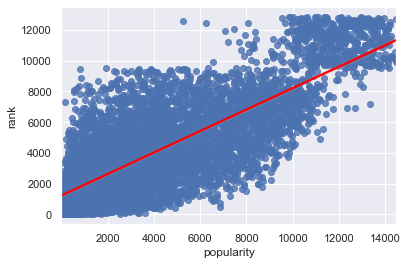

In [11]:
# ratings versus popularity regression plot
sb.set(color_codes=True)
ax = sb.regplot(x="popularity", y="rank", data=anime_df,line_kws={'color':'red'})

In [12]:
# anime_df sorted by rank
anime_sorted_rank_df = anime_df.sort_values(by=['rank'])
anime_sorted_rank_df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
1261,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,64,Finished Airing,...,Sundays at 17:00 (JST),"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",24.0,2009.0
529,32281,Kimi no Na wa.,Your Name.,君の名は。,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1,Finished Airing,...,NaN,"{'Adaptation': [{'mal_id': 99314, 'type': 'man...","Kadokawa Shoten, Toho, Sound Team Don Juan, La...","Funimation, NYAV Post",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",106.0,2016.0
639,28977,Gintama°,Gintama Season 4,銀魂°,Gintama&#039; (2015),https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Wednesdays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'...","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",24.0,2015.0
2953,30484,Steins;Gate 0,NaN,シュタインズ・ゲート ゼロ,"Steins,Gate Zero",https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,23,Currently Airing,...,Thursdays at 01:35 (JST),"{'Adaptation': [{'mal_id': 107548, 'type': 'ma...",Nitroplus,Funimation,White Fox,"Sci-Fi, Thriller","['""Fatima (ファティマ)"" by Kanako Itou']","['""LAST GAME"" by Zwei']",23.0,2018.0
1475,9253,Steins;Gate,Steins;Gate,STEINS;GATE,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,24,Finished Airing,...,Wednesdays at 02:05 (JST),"{'Adaptation': [{'mal_id': 17517, 'type': 'man...","Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十...",24.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,19857,Kagachi-sama Onagusame Tatematsurimasu: Netora...,NaN,かがち様お慰め奉ります ~寝取られ村淫夜噺~ THE ANIMATION,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Visual novel,1,Finished Airing,...,NaN,[],Pink Pineapple,NaN,Seven,Hentai,[],[],25.0,2013.0
6581,5054,Kojin Jugyou The Animation: Schoolgirl Ready f...,NaN,個人授業 THE ANIMATION～Schoolgirl ready for a priv...,Kojin Jugyou,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,2,Finished Airing,...,NaN,[],Pink Pineapple,NaN,Flavors Soft,Hentai,[],[],30.0,2008.0
6602,3050,Panchira Teacher,Panty Flash Teacher,パンチラティーチャー,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,2,Finished Airing,...,NaN,[],"Green Bunny, Discovery",Media Blasters,AT-2,"Hentai, School",[],[],30.0,2004.0
6619,13595,"Suki de Suki de, Suki de The Animation",NaN,"好きで好きで, すきで THE ANIMATION",NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,2,Finished Airing,...,NaN,"{'Adaptation': [{'mal_id': 36491, 'type': 'man...",Pink Pineapple,NaN,Office Takeout,Hentai,[],[],30.0,2012.0


In [13]:
# anime_df sorted by popularity
anime_sorted_popularity_df = anime_df.sort_values(by=['popularity'])
anime_sorted_popularity_df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
3802,1535,Death Note,Death Note,デスノート,DN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,37,Finished Airing,...,Wednesdays at 00:56 (JST),"{'Adaptation': [{'mal_id': 21, 'type': 'manga'...","VAP, Konami, Ashi Production, Nippon Televisio...",Viz Media,Madhouse,"Mystery, Police, Psychological, Supernatural, ...","['#1: ""the WORLD"" by Nightmare (eps 1-19)', '#...","['#1: ""Alumina"" by Nightmare (eps 1-19)', '#2:...",23.0,2006.0
3897,16498,Shingeki no Kyojin,Attack on Titan,進撃の巨人,AoT,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Sundays at 01:58 (JST),"{'Adaptation': [{'mal_id': 23390, 'type': 'man...","Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,"Action, Military, Mystery, Super Power, Drama,...","['#1: ""Guren no Yumiya (紅蓮の弓矢)"" by Linked Hori...","['#1: ""Utsukushiki Zankoku na Sekai (美しき残酷な世界)...",24.0,2013.0
3009,11757,Sword Art Online,Sword Art Online,ソードアート・オンライン,"S.A.O, SAO",https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,25,Finished Airing,...,Sundays at 00:00 (JST),"{'Adaptation': [{'mal_id': 21479, 'type': 'man...","Aniplex, Genco, DAX Production, ASCII Media Works",Aniplex of America,A-1 Pictures,"Action, Adventure, Fantasy, Game, Romance","['#1: ""crossing field"" by LiSA (eps 2-14)', '#...","['#1: ""crossing field"" by LiSA (eps 1, 25)', '...",23.0,2012.0
1261,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,64,Finished Airing,...,Sundays at 17:00 (JST),"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",24.0,2009.0
4215,30276,One Punch Man,One Punch Man,ワンパンマン,"One Punch-Man, One-Punch Man, OPM",https://myanimelist.cdn-dena.com/images/anime/...,TV,Web manga,12,Finished Airing,...,Mondays at 01:05 (JST),"{'Adaptation': [{'mal_id': 44347, 'type': 'man...","TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",Viz Media,Madhouse,"Action, Sci-Fi, Comedy, Parody, Super Power, S...","['""THE HERO !! ~Okoreru Kobushi ni Hi wo Tsuke...","['#1: ""Hoshi yori Saki ni Mitsukete Ageru (星より...",24.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6648,37859,Free! Movie 2: Timeless Medley - Yakusoku: Cha...,NaN,劇場版 Free!-Timeless Medley- 約束 キャラクター舞台挨拶,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,4,Finished Airing,...,NaN,"{'Other': [{'mal_id': 35191, 'type': 'anime', ...",NaN,NaN,Kyoto Animation,Comedy,[],[],5.0,2017.0
6644,37860,Free!: Take Your Marks: Character Butai Aisatsu,NaN,特別版 Free!-Take Your Marks- キャラクター舞台挨拶,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,4,Finished Airing,...,NaN,"{'Other': [{'mal_id': 35198, 'type': 'anime', ...",NaN,NaN,Kyoto Animation,Comedy,[],[],6.0,2017.0
6640,37814,Inazuma Eleven Reloaded: Reformation of Soccer,NaN,イナズマイレブン リローデッド ～サッカーの変革へんかく～,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Special,Game,1,Finished Airing,...,NaN,"{'Alternative version': [{'mal_id': 5231, 'typ...",NaN,NaN,OLM,Sports,[],[],24.0,2018.0
6659,37493,Watashitachi no Mirai,NaN,私たちの未来,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,1,Finished Airing,...,NaN,"{'Other': [{'mal_id': 37494, 'type': 'anime', ...",NaN,NaN,Nippon Animation,Kids,[],[],0.0,2018.0


Because we are primarily concerned with how highly rated an anime is, we will be focussing on the rank of an anime. In the following section, it is further established that popular anime is generally high in rank.

#### **1.1.1** Correlation of Feature Variables

These are correlation tables for the quantatative variables that we will use for analysis.

,anime_id,episodes,airing,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
anime_id,1.000000,-0.109610,0.223734,-0.223733,-0.046057,0.274671,0.205813,-0.032301,-0.054066,-0.205838,0.623290
episodes,-0.109610,1.000000,-0.037289,0.076875,0.068544,-0.049064,-0.009545,0.079572,0.106804,-0.105711,-0.147920
airing,0.223734,-0.037289,1.000000,-0.066910,-0.046482,0.100467,0.079229,-0.030711,-0.004717,-0.086957,0.142681
score,-0.223733,0.076875,-0.066910,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094,0.298989,0.042159
scored_by,-0.046057,0.068544,-0.046482,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949,0.046203,0.110892
rank,0.274671,-0.049064,0.100467,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503,-0.294528,-0.063543
popularity,0.205813,-0.009545,0.079229,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745,-0.159596,-0.236951
members,-0.032301,0.079572,-0.030711,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565,0.039457,0.135725
favorites,-0.054066,0.106804,-0.004717,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000,0.002669,0.031254
duration_min,-0.205838,-0.105711,-0.086957,0.298989,0.046203,-0.294528,-0.159596,0.039457,0.002669,1.000000,-0.183812


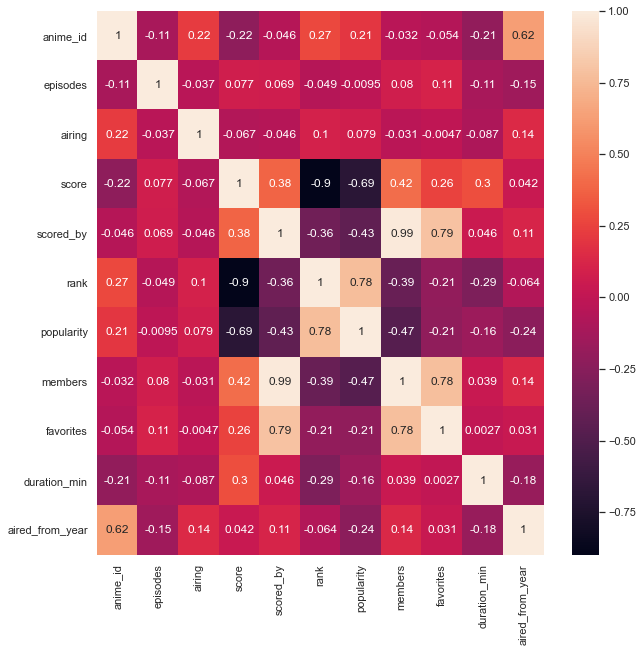

In [14]:
anime_corr = anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(anime_corr, annot=True)

# correlation matrix
anime_corr

As we can see in the correlation matrix above, the correlation between rank and popularity is 0.777302, indicating that there is a significant association between the rank of an anime and its popularity. 

### **1.2** Score Distribution of All Data

This is the distribution of scores created by the users according to the dataframe. The average score is **6.848998200359928** for all scores according to the distribution.

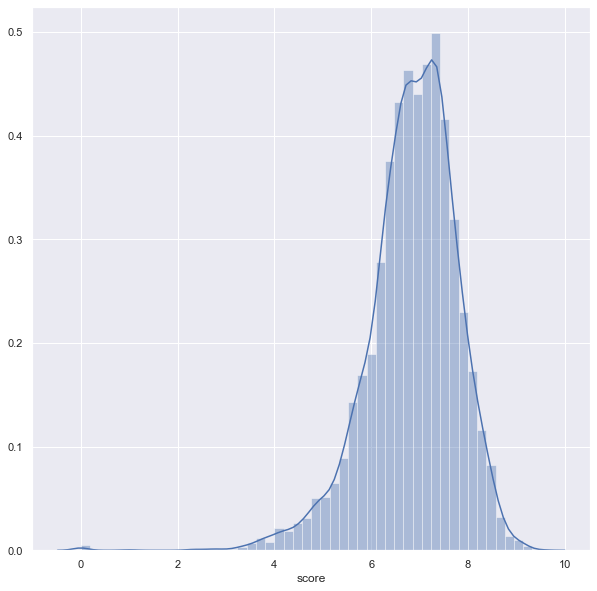

In [15]:
# distribution plot of scores
ax = sb.distplot(anime_df['score'])

In [16]:
# mean of scores
average_score = anime_df['score'].mean()
average_score

6.848998200359928

### **1.3** Scores and Rank by Qualatative Variables
We want to visualize the categorical variables that can contribute to an anime's popularity. Although we cannot build models on categorical variables, it is helpful to visualize what factors contribute to an anime's popularity currently.

Here, we see the distribution and means of the categorical variables that I think have the most impact on an anime's popularity, which are:
1. Genre
2. Production Studio
3. Year of Airing
4. Name of Anime

Note that the Name of Anime categorical variable depends on the viewer Animelists and ratings, which will require merging `anime_df` and `animelist_df`.

#### **1.3.1** Genres
TODO: description of genres

TODO: genres

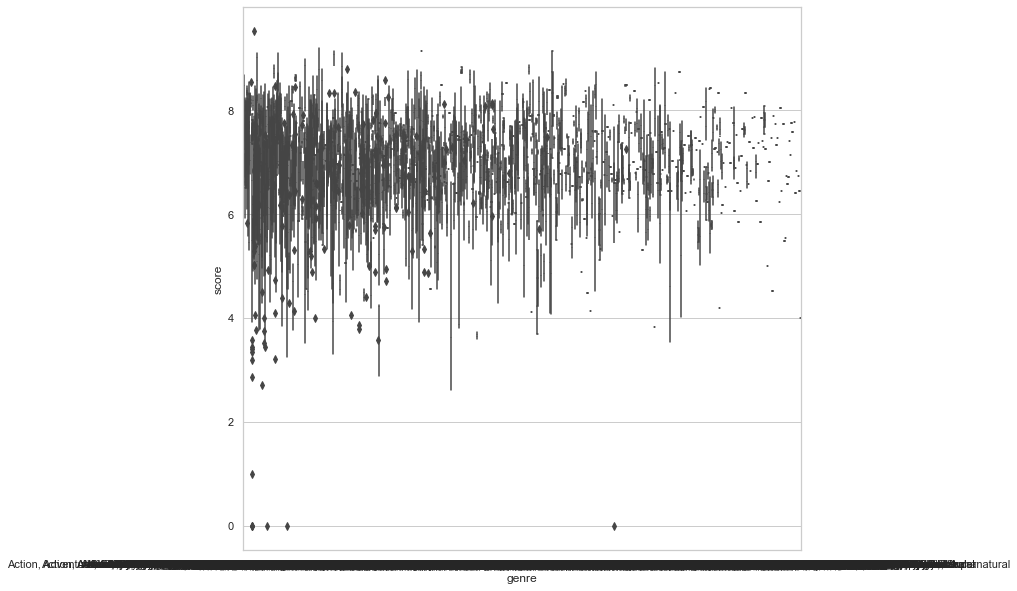

In [17]:
# boxplot of mean scores per genre
# TODO
sb.set(style="whitegrid")
ax = sb.boxplot(x='genre', y='score', data=anime_df)

In [18]:
# mean rank per genre
# TODO

#### **1.3.2** Production Studio
TODO: description of genres

In [19]:
# boxplot of mean scores per studio
# NOTE: click on image to enlarge for detailed view
sb.set(style="whitegrid")
sb.set(rc={'figure.figsize':(700,60)})
ax = sb.boxplot(x='studio', y='score', data=anime_df)

In [20]:
# sorted by the highest ranked production studio
anime_studio_means = anime_df[['rank','studio']].groupby(['studio']).mean()
anime_studio_means = anime_studio_means.sort_values(by=['rank'])
anime_studio_means

,rank
studio,
"Artland, Magic Bus",6.0
"J.C.Staff, Egg Firm",65.5
Studio Chizu,68.0
"Madhouse, Satelight, Graphinica",92.0
"Xebec, AIC",131.0
...,...
"Sugar Boy, Blue Cat",NaN
Suzuki Mirano,NaN
T-Rex,NaN


In [21]:
# number of anime produced by each studio
anime_year_counts = anime_df[['rank', 'studio']].groupby(['studio']).count()
anime_year_counts = anime_year_counts.sort_values(['rank'], ascending=False)
anime_year_counts

,rank
studio,
Toei Animation,403
Sunrise,277
Madhouse,241
Studio Pierrot,235
J.C.Staff,231
...,...
Chippai,0
Circle Tribute,0
Majin,0


In [22]:
# distribution of number of anime produced by each production studio
# TODO

From the boxplot above, we can see that some studios produce anime that is more highly rated. As such, our modelling should include the studio as a categorical variable.

#### **1.3.3** Airing Year
The airing year refers to the year that the anime is released. Anime may have differing popularities depending on recency, and the following EDA serves to provide some analysis as to whether airing date affects rank or not.

In [23]:
# boxplot of mean scores per year
# NOTE: click on image to enlarge for detailed view
sb.set(rc={'figure.figsize':(300,60)})
ax = sb.boxplot(x='aired_from_year', y='score', data=anime_df)

In [24]:
# distribution of number of scores per airing year
# TODO

In [25]:
# sorted by the highest ranked airing years
anime_year_means = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).mean()
anime_year_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_year_means

,rank
aired_from_year,
1978.0,3068.272727
2008.0,3143.991031
1995.0,3156.274194
2007.0,3435.382883
2005.0,3464.925714
...,...
1944.0,8749.000000
1943.0,8978.500000
1962.0,9606.000000


In [26]:
# number of anime aired in each year
anime_year_counts = anime_df[['rank', 'aired_from_year']].groupby(['aired_from_year']).count()
anime_year_counts

,rank
aired_from_year,
1942.0,1
1943.0,2
1944.0,1
1945.0,1
1957.0,1
...,...
2014.0,403
2015.0,463
2016.0,546


From the outputs of the box plots and the sorting by rank, it appears that there is not a significant impact of airing day on popularity. Thus, we will not be using airing date as a categorical variable in our analysis.

#### **1.3.4** Source

Source refers to the original source for the given anime (ie. the anime that the source was adapted from).

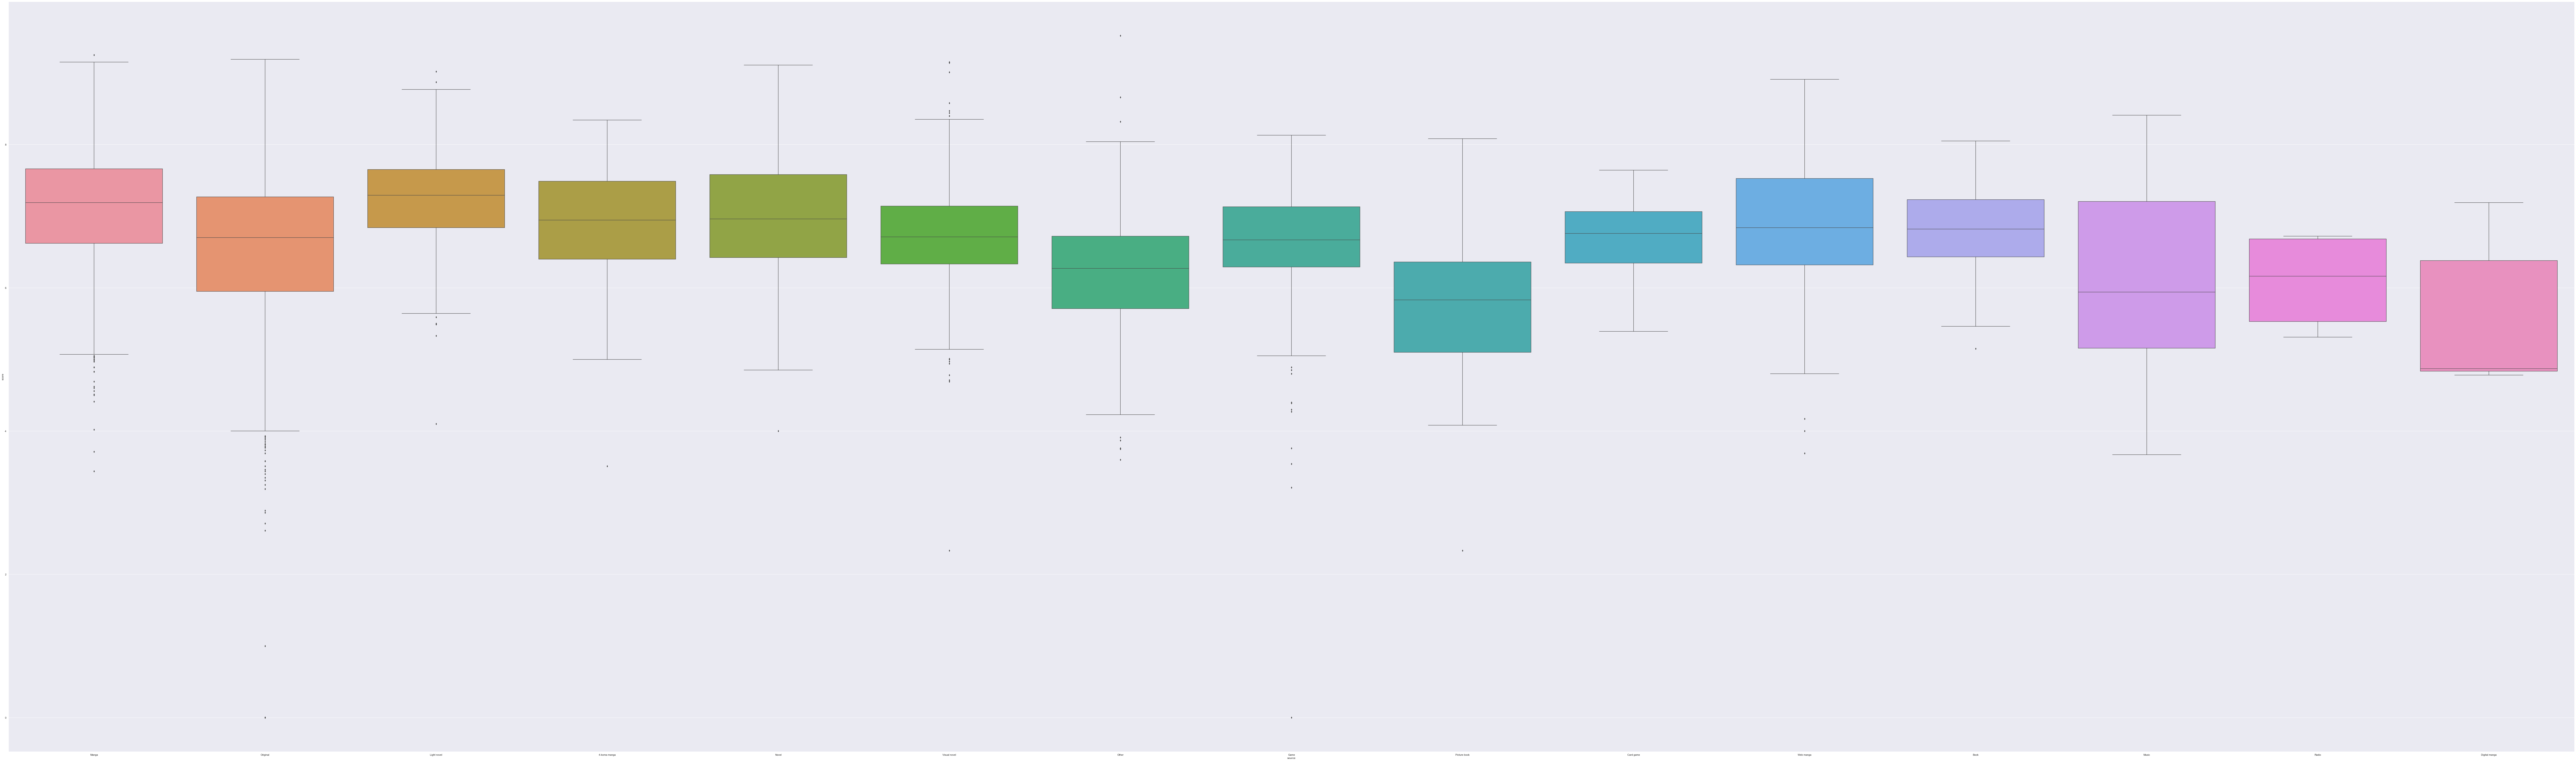

In [27]:
sb.set(rc={'figure.figsize':(200,60)})
ax = sb.boxplot(x='source', y='score', data=anime_df)

In [28]:
# sorted by the highest ranked sources
anime_source_means = anime_df[['rank', 'source']].groupby(['source']).mean()
anime_source_means = anime_year_means.sort_values(by=['rank'], ascending=True)
anime_source_means

,rank
aired_from_year,
1978.0,3068.272727
2008.0,3143.991031
1995.0,3156.274194
2007.0,3435.382883
2005.0,3464.925714
...,...
1944.0,8749.000000
1943.0,8978.500000
1962.0,9606.000000


### **1.4** Title Frequency

This is for evaluation of ratings per title by users per anime title.

In [44]:
# sb.set(rc={'figure.figsize':(800,60)})
# matplotlib.rcParams.update(
#     {
#         'text.usetex': False,
#         'font.family': 'stixgeneral',
#         'mathtext.fontset': 'stix',
#     }
# )
# ax = sb.boxplot(x='title', y='score', data=merged_anime_df)

# TODO: fix this pls

NameError: name 'matplotlib' is not defined

## **2.** Feature Selection/Extraction

**notes:**
* sort by popularity

for reference, the columns are:

['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme', 'duration_min',
       'aired_from_year']

### **2.1** Dropping Uncessary Categorical Variables

In [ ]:
# dropping uncessary features
# new_anime_df = merged_anime_df.groupby(['source'])
new_anime_df = merged_anime_df[['anime_id', 'username', 'title', 'score', 'scored_by', 'rank', 'popularity', 'members', 'source', 'favorites', 'studio', 'genre']]
new_anime_df

### **2.2** Encoding Categorical Variables

We have to encode the categorical variables also going to be used for our analysis. This includes:
* Genre
* Studio
* Title of Anime

In [ ]:
# studio
encoder = LabelEncoder()
studio_labels = encoder.fit_transform(new_anime_df['studio'])

# mappings
studio_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
studio_mappings # from the output, there are 710 studios in total

In [ ]:
# source
source_labels = encoder.fit_transform(new_anime_df['source'])

# mappings
source_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
source_mappings

In [ ]:
# title
title_labels = encoder.fit_transform(new_anime_df['title'])

# mappings
title_mappings = {
    index: label for index, label in enumerate(encoder.classes_)
}
title_mappings

In [34]:
new_anime_df['studio_labels'] = studio_labels
new_anime_df['source_labels'] = source_labels
new_anime_df['title_labels'] = title_labels

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### **2.3** Score Threshold

#### **2.3.1** Updated Correlations

,anime_id,score,scored_by,rank,popularity,members,favorites,studio_labels,source_labels,title_labels
anime_id,1.000000,-0.071818,-0.025726,0.097500,-0.028723,-0.013706,-0.101743,-0.054076,-0.053248,0.023992
score,-0.071818,1.000000,0.481106,-0.950334,-0.542570,0.513988,0.460448,0.013325,-0.028809,0.010750
scored_by,-0.025726,0.481106,1.000000,-0.405722,-0.514282,0.988469,0.828085,-0.060183,-0.007637,-0.049637
rank,0.097500,-0.950334,-0.405722,1.000000,0.552803,-0.437696,-0.331089,-0.014761,0.054952,-0.010364
popularity,-0.028723,-0.542570,-0.514282,0.552803,1.000000,-0.561665,-0.319582,0.080301,0.065358,0.047992
members,-0.013706,0.513988,0.988469,-0.437696,-0.561665,1.000000,0.830157,-0.070441,-0.008397,-0.050807
favorites,-0.101743,0.460448,0.828085,-0.331089,-0.319582,0.830157,1.000000,-0.011247,0.046869,-0.035514
studio_labels,-0.054076,0.013325,-0.060183,-0.014761,0.080301,-0.070441,-0.011247,1.000000,0.074345,0.020402
source_labels,-0.053248,-0.028809,-0.007637,0.054952,0.065358,-0.008397,0.046869,0.074345,1.000000,-0.009524
title_labels,0.023992,0.010750,-0.049637,-0.010364,0.047992,-0.050807,-0.035514,0.020402,-0.009524,1.000000


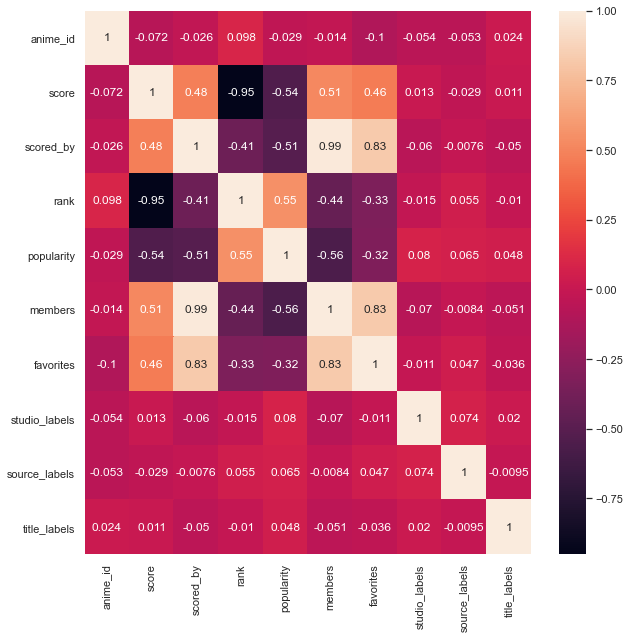

In [35]:
# updated correlation heatmap based on feature variables
updated_anime_corr = new_anime_df.corr(method='pearson')

# heatmap for easier visualization
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(updated_anime_corr, annot=True)

# correlation matrix
updated_anime_corr

#### **2.3.2** Score Mean Threshold

Because the feature variables yielded little correlation to the outcome variable (ie. score), we are only going to investigate the anime whose rating pass a threshold. We denote these anime with a binary measure, denoted `above_average`, added to `new_anime_df`.

In [36]:
new_anime_df['score'].mean()

7.578264959723822

In [37]:
# average score is 7.58
# 1 for above average score, 0 for below
pd.options.mode.chained_assignment = None
new_anime_df['above_average'] = np.where(new_anime_df['score'] >= 7.58, '1', '0')
new_anime_df

,anime_id,username,title,score,scored_by,rank,popularity,members,source,favorites,studio,genre,studio_labels,source_labels,title_labels,above_average
2713527,1575,SanGoten,Code Geass: Hangyaku no Lelouch,8.79,627740,30.0,9,986897,Original,63614,Sunrise,"Action, Military, Sci-Fi, Super Power, Drama, ...",519,9,871,1
30896968,18039,pantythief666,Rescue Me!,6.06,10002,7216.0,2781,18381,Manga,7,Hoods Entertainment,"Ecchi, Harem, Romance",207,6,4362,0
11389752,47,PervySan,Akira,8.16,190829,352.0,198,310133,Manga,5029,Tokyo Movie Shinsha,"Action, Military, Sci-Fi, Adventure, Horror, S...",579,6,160,1
22030059,20047,lolibuns,Sakura Trick,7.15,67365,3008.0,567,146435,4-koma manga,1165,Studio Deen,"Slice of Life, Comedy, Romance, School, Seinen...",462,0,4505,0
19160353,23133,Niji-san,M3: Sono Kuroki Hagane,6.69,13314,4803.0,1645,44827,Original,82,Satelight,"Action, Sci-Fi, Mystery, Psychological, Drama,...",408,9,3104,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18222350,35849,OtakuBaz,Darling in the FranXX,8.17,76973,342.0,239,276912,Original,4991,"A-1 Pictures, Trigger, CloverWorks","Action, Sci-Fi, Drama, Mecha",8,9,1021,1
14357224,43,zhenya,Ghost in the Shell,8.35,182809,192.0,174,329663,Manga,7755,Production I.G,"Action, Sci-Fi, Police, Psychological, Mecha, ...",373,6,1653,1
17520468,28735,IndianAnimeReker,Shouwa Genroku Rakugo Shinjuu,8.63,47463,66.0,590,141260,Manga,3259,Studio Deen,"Drama, Historical, Josei",462,6,4824,1
20995678,3389,Lumbagor,Bus Gamer,6.62,12905,5101.0,2511,22317,Manga,38,Anpro,Action,50,6,674,0


## **3.** Modelling 

### **3.1** Baseline Model: Linear Regression

#### **3.1.1** Training, Test, and Validation Sets

In [38]:
features = new_anime_df[['title_labels', 'scored_by', 'popularity', 'members', 'source_labels', 'favorites', 'studio_labels']].copy()
labels = new_anime_df['above_average']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
# TODO: update test size and random state with JUSTIFICATIONS

In [40]:
# only used for validation at the end - ie. for unseen validation data
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
# TODO: update test size and random state with JUSTIFICATION

#### **3.1.2** Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [ ]:
# comparison of output values
lr_df = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten()})
lr_df

In [ ]:
# mean absolute
print(metrics.mean_absolute_error(y_test, y_pred))
# mean squared error
print(metrics.mean_squared_error(y_test, y_pred))
# root mean squared error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### **3.2** Random Forest Model

#### **3.2.1** Optimizing Input Parameters

In [ ]:
# uses maximum depth and number 
# TODO: printing results function?

rf = RandomForestClassifier()
parameters = {
    'max_depth': [10, 20, None],
    'n_estimators': [50, 100]
}

rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(x_train, y_train.values.ravel())

#### **3.2.2** Random Forest

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20)
rf_model.fit(x_train, y_train)
rf_predicted_values = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, rf_predicted_values)
print(accuracy)

0.9999360695563227


Accuracy: TODO

#### **3.2.3** Relative Importance of Input Variables

In [43]:
# TODO: print relative importances using rf_model
for name, val in zip(features.columns, rf_model.feature_importances_):
    print(name + ": " + val)

#### **3.2.4** Decision Tree Visualization

Used to see how the data is passed as a visualization.

In [46]:
# export_graphviz(tree, feature_names=features.columns, out_file='rf_tree.dot', filled=True)
# TODO: tree?

### **3.3** Multilayer Perceptron

Multilayer Perceptrons (MLP) are a class of feed-forward neural networks, meant to emulate the neurophysiological process by whic hthe brain processes and stores information.

TODO: write more.

**Hyperparameters:** to optimize for our model, we are going to use `hidden_layer_sizes`, which refers to the number of nodes in some hidder layer, and `activation` as the activation function.

**Activation function:** going to compute logistic and relu activations. 
TODO: more justification and discussion on this.

#### **3.3.1** MLP

In [47]:
mlp = MLPClassifier()

In [48]:
parameters = {
    'hidden_layer_sizes': [(10,), (50,)],
     'activation': ['logistic', 'relu']
}

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cluster_data(data_arr)
    
mlp_cv = GridSearchCV(mlp, parameters, cv=5)
mlp_cv.fit(x_train, y_train.values.ravel())

print_results(mlp_cv)

Accuracy: TODO

#### **3.3.2** Assessing Performance

In [ ]:
loss_values = mlp_model.loss_curve_
mlp_model.score

In [ ]:
# plotting
plt.plot(loss_values)
plt.ylim((0.61,0.640))
plt.axvline(10,0,0.7)
plt.show()

### **3.4** Model Validation

In [ ]:
# use joblib to store

## **4.** Conclusion